In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")
df_clean = df.drop(columns=['id', 'Unnamed: 32'])


In [4]:
#  Codificar la variable 'diagnosis' (M = 1, B = 0)
label_encoder = LabelEncoder()
df_clean['diagnosis'] = label_encoder.fit_transform(df_clean['diagnosis'])


In [5]:
#  Separar características y variable objetivo
X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']

#  Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[[-1.44798723 -0.45602336 -1.36665103 ...  0.91959172  2.14719008
   1.85943247]
 [ 1.97750799  1.69418666  2.08961867 ...  2.6752184   1.9368786
   2.46346488]
 [-1.40708919 -1.26351565 -1.34976305 ... -0.97048581  0.61676962
   0.05287682]
 ...
 [ 0.04621146 -0.57470379 -0.06874782 ... -1.23756033 -0.71628161
  -1.26047806]
 [-0.04183295  0.07687501 -0.03497186 ...  1.03683652  0.45013821
   1.19444266]
 [-0.5530585   0.28631105 -0.60751564 ... -0.61357437 -0.33448538
  -0.84042616]] [[-0.47069438 -0.16048584 -0.44810956 ... -0.19956318  0.18320441
   0.19695794]
 [ 1.36687747  0.47014935  1.30288585 ...  0.97897545 -0.56582801
  -1.00057787]
 [ 0.37850807  0.04429607  0.40082046 ...  0.56024403 -0.10314275
  -0.20813168]
 ...
 [-0.74050787 -1.01451947 -0.74550281 ... -0.28209134 -0.3830188
  -0.3245049 ]
 [ 0.02633046  1.99205126  0.02393013 ... -0.49358878 -1.63518099
  -0.33170895]
 [ 1.87526288  2.75300221  1.80128727 ...  0.78102969 -0.05299156
  -0.0978542 ]] 68     0
181    1


In [ ]:
#Entrenar modelo SVM (kernel lineal)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [11]:
#  Realizar predicciones
y_pred = svm_model.predict(X_test)

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno']))

Precisión del modelo: 0.956140350877193
Matriz de confusión:
 [[68  3]
 [ 2 41]]
Reporte de clasificación:
               precision    recall  f1-score   support

     Benigno       0.97      0.96      0.96        71
     Maligno       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# para visualizar el pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['diagnosis'] = y.values


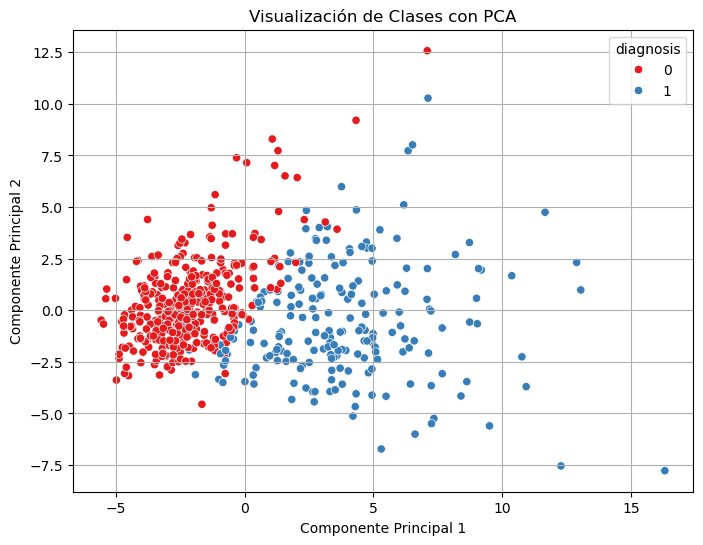

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='diagnosis', palette='Set1')
plt.title('Visualización de Clases con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

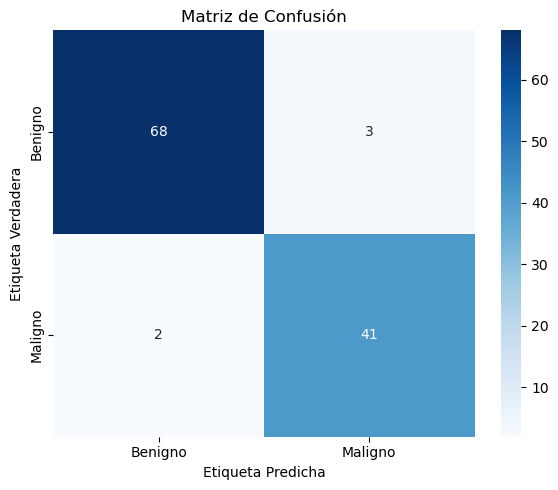

In [21]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout()
plt.show()

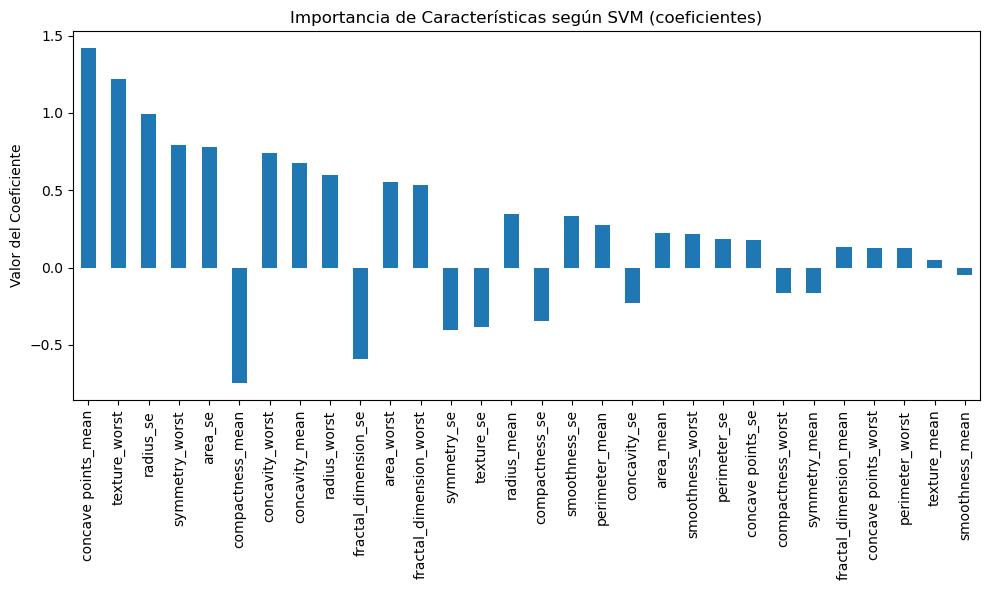

In [18]:
coef = pd.Series(svm_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
plt.figure(figsize=(10, 6))
coef.plot(kind='bar')
plt.title('Importancia de Características según SVM (coeficientes)')
plt.ylabel('Valor del Coeficiente')
plt.tight_layout()
plt.show()